<a href="https://colab.research.google.com/github/janvi432/Final-Portfolio-Classification-Task/blob/main/2513327_JanviPradhanang_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Janvi Pradhanang

Student ID: 2513327

**Analysis of Cardiovascular Disease Risk Factors**

In [37]:
# Import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE

In [38]:
# Load the dataset
df = pd.read_csv('cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Dataset Description**

**Dataset:** Cardiovascular Disease dataset

**1. Dataset Creation**
*   Originally collected for cardiovascular health studies, shared on Kaggle by Bugrahan in 2019.

**2. Access:**
*   The dataset was accessed from Kaggle, an open data and data science platform.
*   [Cardiovascular Disease Dataset]( https://www.kaggle.com/code/bugrahan/starter-cardiovascular-disease-dataset-dcb9c7a2-4)

*  loaded into Pandas DataFrame.

**3.  Alignment with UNSDG**

*   The dataset aligns with UN Sustainable Development Goal 3 (SDG 3): Good Health and Well-being, as it focuses on cardiovascular disease. It helps to analyze risk factors for cardiovascular disease.



**4.  Dataset Attributes**
*   id: Unique identifier for each patient

*   age: Age of the patient in days

*   gender: Gender of the patient (1 = female, 2 = male)

*   height: Height in centimeters

*   weight: Weight in kilograms

*   ap_hi: Systolic blood pressure

*   ap_lo: Diastolic blood pressure

*   cholesterol: Cholesterol level (1 = normal, 2 = above normal, 3 = well above normal)

*   gluc: Glucose level (1 = normal, 2 = above normal, 3 = well above normal)

*   smoke: Smoking status (0 = no, 1 = yes)

*   alco: Alcohol intake (0 = no, 1 = yes)

*   active: Physical activity status (0 = no, 1 = yes)

*  cardio: Target variable indicating presence of cardiovascular disease

*   0 = No cardiovascular disease

*   1 = Presence of cardiovascular disease

**Initial Dataset Exploration**

In [39]:
# Dataset shape
print("Rows, Columns:", df.shape)

Rows, Columns: (70000, 13)


In [40]:
# Dataset types
print("Column Data Types (Before Conversion):")
df.dtypes

Column Data Types (Before Conversion):


,0
id,int64
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64


In [41]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [42]:
# Missing values
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


**1. EDA and  Data Preprocessing**

In [43]:
# Convert age from days to years for better understanding
df['age_years'] = (df['age'] / 365.25).round().astype(int)

In [44]:
# Keep realistic systolic blood pressure values
df = df[(df['ap_hi'] >= 60) & (df['ap_hi'] <= 250)]

# Keep realistic diastolic blood pressure values
df = df[(df['ap_lo'] >= 40) & (df['ap_lo'] <= 150)]

# Systolic pressure must be higher than diastolic pressure
df = df[df['ap_hi'] > df['ap_lo']]

In [45]:
# Keep realistic human height values
df = df[(df['height'] >= 130) & (df['height'] <= 220)]

# Keep realistic human weight values
df = df[df['weight'] >= 40]

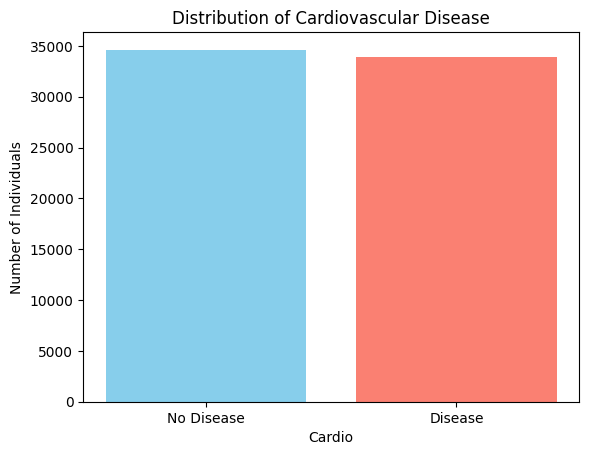

In [46]:
# Bar plot: Distribution of Target Variable
counts = df['cardio'].value_counts()
plt.bar(counts.index, counts.values, color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.title("Distribution of Cardiovascular Disease")
plt.xlabel("Cardio")
plt.ylabel("Number of Individuals")
plt.show()



*   The bar chart illustrates the distribution of the target variable (cardio),comparing individuals with and without cardiovascular disease. The two classes are almost evenly represented, with a slightly higher number of individuals without the disease. This near-balanced class distribution suggests that the dataset does not suffer from severe class imbalance.



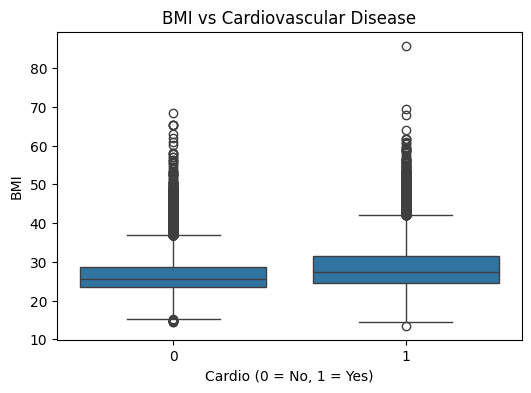

In [47]:
df["bmi"] = df["weight"] / ((df["height"] / 100) ** 2)
plt.figure(figsize=(6,4))
sns.boxplot(x="cardio", y="bmi", data=df)
plt.title("BMI vs Cardiovascular Disease")
plt.xlabel("Cardio (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.show()



*   The boxplot compares the Body Mass Index (BMI) distribution between individuals without cardiovascular disease (cardio = 0) and those with the disease (cardio = 1). Individuals with cardiovascular disease tend to have a higher median BMI and a wider interquartile range, indicating greater variability in BMI values.


In [48]:
df = df.drop(columns=["bmi"])

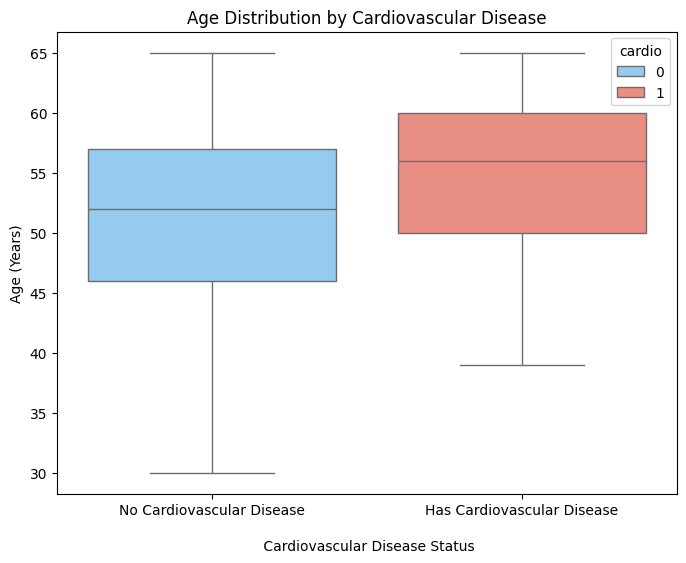

In [49]:
# Boxplot: Age Distribution by Cardiovascular Disease
plt.figure(figsize=(8,6))
sns.boxplot(x='cardio', y='age_years', data=df,hue='cardio', palette=['#87CEFA', '#FA8072'] )
plt.title("Age Distribution by Cardiovascular Disease")
plt.xlabel("\n Cardiovascular Disease Status")
plt.ylabel("Age (Years)")
plt.xticks([0, 1], ["No Cardiovascular Disease", "Has Cardiovascular Disease"])
plt.show()



*   The boxplot shows the distribution of age for individuals with and without cardiovascular disease. Individuals diagnosed with cardiovascular disease tend to be older, as indicated by a higher median age compared to those without the disease.




In [50]:
# Drop 'id' as it is not a predictive feature
df.drop('id', axis=1, inplace=True)

In [51]:
# Drop 'age'as it is converted to'age years'
df = df.drop('age', axis=1)

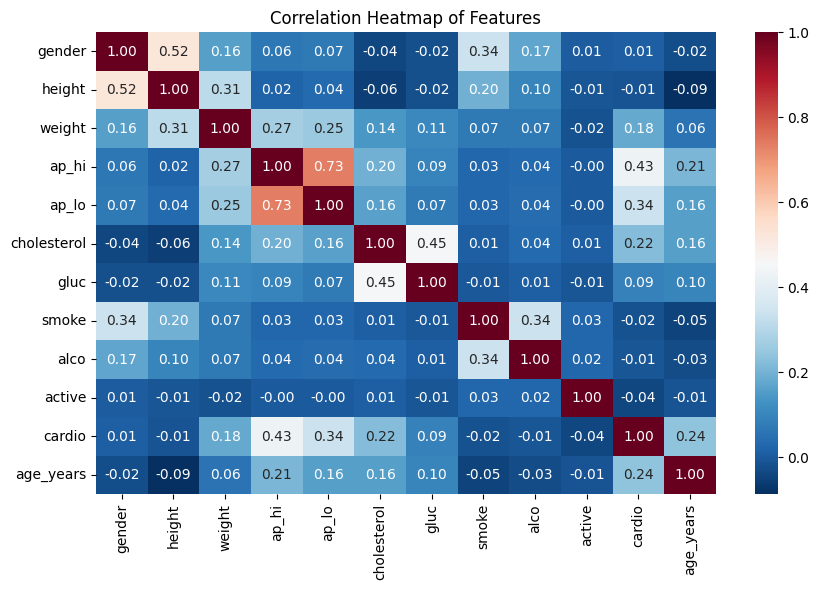

In [52]:
# Heatmap: Correlation Matrix of Features
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu_r")
plt.title("Correlation Heatmap of Features")
plt.show()



*   The strongest predictor of cardiovascular disease is systolic blood pressure (ap_hi) with a correlation of 0.43, followed by diastolic blood pressure (ap_lo) at 0.34. Age, whether in days or years, shows a positive correlation of 0.24, and cholesterol has a smaller positive correlation of 0.22.



In [53]:
# Split Features (X) and Target (y)
# The target variable is 'cardio'
X = df.drop('cardio', axis=1)
y = df['cardio']

In [54]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [55]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Preprocessing complete.")
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Preprocessing complete.
Training set size: 54824
Testing set size: 13707


**2. Neural Network Model (MLPClassifier)**

In [56]:
# Build the Neural Network (MLP) model
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate_init=0.0003,
    max_iter=300,
    random_state=42,
)

# 2. Train the model
mlp_model.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), learning_rate_init=0.0003,
              max_iter=300, random_state=42)



*   A Neural Network–based classifier was implemented using a Multi-Layer Perceptron (MLP). The model has two hidden layers with 64 and 32 neurons, using the ReLU activation function. It is trained with the Adam optimizer, a learning rate of 0.0003, and L2 regularization (alpha = 0.0001) for up to 300 iterations. The network uses a cross-entropy loss function.



In [57]:
# Evaluate on Training Set
y_train_pred = mlp_model.predict(X_train_scaled)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"\nTraining Accuracy: {train_acc:.4f}")

# Evaluate on Test Set
y_test_pred = mlp_model.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc:.4f}")

# Detailed Metrics on Test Set
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.7397
Test Accuracy: 0.7348

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      6925
           1       0.74      0.71      0.73      6782

    accuracy                           0.73     13707
   macro avg       0.74      0.73      0.73     13707
weighted avg       0.74      0.73      0.73     13707

Confusion Matrix:
[[5264 1661]
 [1974 4808]]


**3. Classical ML Models: Logistic Regression & Random Forest**

In [58]:
# Logistic Regression (Original Model)
log_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)

log_model.fit(X_train_scaled, y_train)

# Predict on Test Set
y_pred_log = log_model.predict(X_test_scaled)

# Evaluate Logistic Regression
log_acc = accuracy_score(y_test, y_pred_log)
print(" Logistic Regression - Original Model")
print(f"Accuracy: {log_acc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

 Logistic Regression - Original Model
Accuracy: 0.7295
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.75      6925
           1       0.75      0.67      0.71      6782

    accuracy                           0.73     13707
   macro avg       0.73      0.73      0.73     13707
weighted avg       0.73      0.73      0.73     13707

Confusion Matrix:
[[5436 1489]
 [2219 4563]]


In [59]:
# Random Forest Classifier (Original Model)
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

# Train Random Forest
rf_model.fit(X_train_scaled, y_train)

# Predict on Test Set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate Random Forest
rf_acc = accuracy_score(y_test, y_pred_rf)
print("\n Random Forest - Original Model")
print(f"Accuracy: {rf_acc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


 Random Forest - Original Model
Accuracy: 0.7002
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      6925
           1       0.70      0.68      0.69      6782

    accuracy                           0.70     13707
   macro avg       0.70      0.70      0.70     13707
weighted avg       0.70      0.70      0.70     13707

Confusion Matrix:
[[4962 1963]
 [2146 4636]]




*   Logistic Regression performed best on this original model with an accuarcy of 0.73, compared to 0.70 for the Random Forest model. Logistic Regression also shows slightly better balance between precision and recall for both classes, indicating it predicts cardiovascular risk more reliably.



In [60]:
# Logistic Regression Hyperparameter Tuning
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']  # liblinear supports l1/l2, lbfgs only l2
}

grid_log = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    param_grid_log,
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

grid_log.fit(X_train_scaled, y_train)

print(" Logistic Regression Best Hyperparameters ")
print(grid_log.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_log.best_score_:.4f}")

 Logistic Regression Best Hyperparameters 
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7275


In [61]:
# Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None,10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid_rf,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train_scaled, y_train)

print("\n Random Forest Best Hyperparameters")
print(grid_rf.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_rf.best_score_:.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



 Random Forest Best Hyperparameters
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.7350


In [62]:
# Evaluate the Tuned Models on Test Set
# Logistic Regression
best_log_model = grid_log.best_estimator_
y_pred_log_tuned= best_log_model.predict(X_test_scaled)
print("\nTuned Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_log_tuned))

# Random Forest
best_rf_model = grid_rf.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test_scaled)
print("Tuned Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))



Tuned Logistic Regression Test Accuracy: 0.7293353760852119
Tuned Random Forest Test Accuracy: 0.7350258991756037


**5. Feature Selection**

In [63]:
# Feature Selection for Logistic Regression
log_estimator = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
rfe_log = RFE(estimator=log_estimator, n_features_to_select=5)  # select top 5 features
rfe_log.fit(X_train_scaled, y_train)

# Selected features
selected_features_log = X.columns[rfe_log.support_]
print(" Logistic Regression Selected Features ")
print(selected_features_log)

# Train Logistic Regression with selected features
X_train_log_fs = X_train_scaled[:, rfe_log.support_]
X_test_log_fs = X_test_scaled[:, rfe_log.support_]

log_model_fs = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_model_fs.fit(X_train_log_fs, y_train)

# Evaluate
y_pred_log_fs = log_model_fs.predict(X_test_log_fs)
print("Logistic Regression Accuracy with Selected Features:", accuracy_score(y_test, y_pred_log_fs))

 Logistic Regression Selected Features 
Index(['weight', 'ap_hi', 'ap_lo', 'cholesterol', 'age_years'], dtype='object')
Logistic Regression Accuracy with Selected Features: 0.726854891661195


In [64]:
# Feature Selection for Random Forest
rf_estimator = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

rfe_rf = RFE(estimator=rf_estimator, n_features_to_select=5)
rfe_rf.fit(X_train_scaled, y_train)

selected_features_rf = X.columns[rfe_rf.support_]
print("\n Random Forest Selected Features ")
print(selected_features_rf)

# Train Random Forest with selected features
X_train_rf_fs = X_train_scaled[:, rfe_rf.support_]
X_test_rf_fs = X_test_scaled[:, rfe_rf.support_]

rf_model_fs = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model_fs.fit(X_train_rf_fs, y_train)

# Evaluate
y_pred_rf_fs = rf_model_fs.predict(X_test_rf_fs)
print("Random Forest Accuracy with Selected Features:", accuracy_score(y_test, y_pred_rf_fs))


 Random Forest Selected Features 
Index(['height', 'weight', 'ap_hi', 'ap_lo', 'age_years'], dtype='object')
Random Forest Accuracy with Selected Features: 0.676734515211206




*   The Recursive Feature Elimination (RFE) technique was used for both Logistic Regression and Random Forest to select the most important features for predicting cardiovascular risk.It removes the least useful features iteratively, keeping only those that improve model accuracy.



**6. Final Models and Comparative Analysis**

In [65]:
# Logistic Regression Final Model

# Use best hyperparameters from GridSearchCV
best_log_model = grid_log.best_estimator_

# Use selected features from RFE
X_train_log_final = X_train_scaled[:, rfe_log.support_]
X_test_log_final = X_test_scaled[:, rfe_log.support_]

# Retrain Logistic Regression on selected features
best_log_model.fit(X_train_log_final, y_train)

# Predictions
y_pred_log_final = best_log_model.predict(X_test_log_final)

# Evaluation
print(" Final Logistic Regression Model ")
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_log_final))
print("Classification Report:\n", classification_report(y_test, y_pred_log_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_final))

 Final Logistic Regression Model 
Accuracy on Test Set: 0.726854891661195
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.74      6925
           1       0.75      0.67      0.71      6782

    accuracy                           0.73     13707
   macro avg       0.73      0.73      0.73     13707
weighted avg       0.73      0.73      0.73     13707

Confusion Matrix:
 [[5448 1477]
 [2267 4515]]


In [66]:
# Random Forest Final Model

# Use best hyperparameters from GridSearchCV
best_rf_model = grid_rf.best_estimator_

# Use selected features from RFE
X_train_rf_final = X_train_scaled[:, rfe_rf.support_]
X_test_rf_final = X_test_scaled[:, rfe_rf.support_]

# Retrain Random Forest on selected features
best_rf_model.fit(X_train_rf_final, y_train)

# Predictions
y_pred_rf_final = best_rf_model.predict(X_test_rf_final)

# Evaluation
print("\n Final Random Forest Model ")
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_rf_final))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_final))


 Final Random Forest Model 
Accuracy on Test Set: 0.7248850952068286
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      6925
           1       0.74      0.68      0.71      6782

    accuracy                           0.72     13707
   macro avg       0.73      0.72      0.72     13707
weighted avg       0.73      0.72      0.72     13707

Confusion Matrix:
 [[5315 1610]
 [2161 4621]]


In [67]:
models_info = [
    ("Neural Network (MLP)", y_test_pred, X_train_scaled.shape[1], None),
    ("Logistic Regression - Original", y_pred_log, X_train_scaled.shape[1], None),
    ("Random Forest - Original",y_pred_rf, X_train_scaled.shape[1], None),
    ("Logistic Regression - Tuned", y_pred_log_tuned, X_train_scaled.shape[1], grid_log.best_score_),
    ("Random Forest - Tuned", y_pred_rf_tuned, X_train_scaled.shape[1], grid_rf.best_score_),
    ("Logistic Regression - Final (RFE)", y_pred_log_final, X_train_log_final.shape[1], None),
    ("Random Forest - Final (RFE)", y_pred_rf_final, X_train_rf_final.shape[1], None)
]

In [68]:
# Build comparison table
comparison_table = pd.DataFrame([
    {
    "Model": name,
    "Features": features,
    "CV Score": round(cv, 2) if cv is not None else None,
    "Accuracy": round(accuracy_score(y_test, y_pred), 2),
    "Precision": round(precision_score(y_test, y_pred, average='weighted'), 2),
    "Recall": round(recall_score(y_test, y_pred, average='weighted'), 2),
    "F1-Score": round(f1_score(y_test, y_pred, average='weighted'), 2)
} for name, y_pred, features, cv in models_info])

# Display the table
comparison_table

,Model,Features,CV Score,Accuracy,Precision,Recall,F1-Score
0,Neural Network (MLP),11,NaN,0.73,0.74,0.73,0.73
1,Logistic Regression - Original,11,NaN,0.73,0.73,0.73,0.73
2,Random Forest - Original,11,NaN,0.70,0.70,0.70,0.70
3,Logistic Regression - Tuned,11,0.73,0.73,0.73,0.73,0.73
4,Random Forest - Tuned,11,0.73,0.74,0.74,0.74,0.73
5,Logistic Regression - Final (RFE),5,NaN,0.73,0.73,0.73,0.73
6,Random Forest - Final (RFE),5,NaN,0.72,0.73,0.72,0.72
